In [148]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
from plotly.graph_objects import * 
import warnings

import seaborn as sns
sns.set(rc={'figure.figsize':(15, 10)})
sns.set(font_scale=2)
sns.set_style("whitegrid")
sns.set_context("talk")

from sklearn.metrics import mean_absolute_error, r2_score

from statsmodels.tsa.arima.model import ARIMA

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [149]:
df = pd.read_csv('monthly-car-sales-new.csv')
df

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587
...,...,...
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180


<AxesSubplot:>

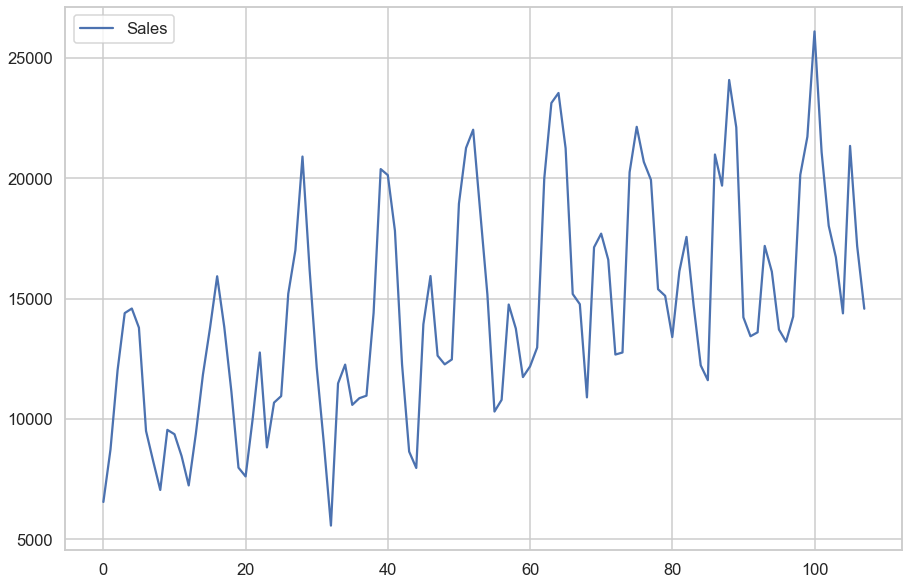

In [150]:
df.plot()

In [151]:
df['Month'] = pd.to_datetime(df['Month'])

In [152]:
df['m'] = df['Month'].dt.month

In [153]:
df['year'] = df['Month'].dt.year

In [154]:
df

,Month,Sales,m,year
0,1960-01-01,6550,1,1960
1,1960-02-01,8728,2,1960
2,1960-03-01,12026,3,1960
3,1960-04-01,14395,4,1960
4,1960-05-01,14587,5,1960
...,...,...,...,...
103,1968-08-01,16722,8,1968
104,1968-09-01,14385,9,1968
105,1968-10-01,21342,10,1968
106,1968-11-01,17180,11,1968


In [155]:
traces = []

for m in df['m'].unique():
    tmp = df[df['m']==m]
    
    traces.append(Scatter(x = tmp['year'], y = tmp['Sales'], name = str(m)))
    
iplot(Figure(data = traces))

In [156]:
train, test = df[0:-12], df[-12:]

out = list()
mod = LinearRegression()

for m in range(1,13):
    train1 = train[train['m']==m]
    test1 = test[test['m']==m]
    
    mod.fit(train1[['year']], train1['Sales'])
    test1['preds'] = mod.predict(test1[['year']])
    
    out.append(test1)

/var/folders/zz/hsmpk95x7nbckptds7j5_q340000gn/T/ipykernel_29241/4001400139.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zz/hsmpk95x7nbckptds7j5_q340000gn/T/ipykernel_29241/4001400139.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zz/hsmpk95x7nbckptds7j5_q340000gn/T/ipykernel_29241/4001400139.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [157]:
test = pd.concat(out)
test

,Month,Sales,m,year,preds
96,1968-01-01,13210,1,1968,14485.571429
97,1968-02-01,14251,2,1968,13619.035714
98,1968-03-01,20139,3,1968,23330.321429
99,1968-04-01,21725,4,1968,24225.535714
100,1968-05-01,26099,5,1968,25590.250000
101,1968-06-01,21084,6,1968,23548.071429
102,1968-07-01,18024,7,1968,16681.071429
103,1968-08-01,16722,8,1968,15807.678571
104,1968-09-01,14385,9,1968,14624.142857
105,1968-10-01,21342,10,1968,19229.214286


In [158]:
print(mean_absolute_error(test['Sales'], test['preds']))
print(r2_score(test['Sales'], test['preds']))

1588.7083333334303
0.7650304668648484


In [159]:
iplot(Figure(data = [Scatter(y = test['Sales']), 
                    Scatter(y = test['preds'])]))

In [160]:
trace1 = Scatter(x = train['Month'], y = train['Sales'], name = 'Train set')
trace2 = Scatter(x = test['Month'], y = test['Sales'], name = 'Test set')
trace3 = Scatter(x = test['Month'], y = test['preds'], name = 'Predictions')

iplot(Figure(data = [trace1, trace2, trace3]))

In [161]:
df1 = pd.read_csv('monthly-car-sales-new.csv')
df1

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587
...,...,...
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180


In [162]:
df1['rol-2'] = df1['Sales'].rolling(2).mean()
df1['rol-6'] = df1['Sales'].rolling(6).mean()
df1

,Month,Sales,rol-2,rol-6
0,1960-01,6550,NaN,NaN
1,1960-02,8728,7639.0,NaN
2,1960-03,12026,10377.0,NaN
3,1960-04,14395,13210.5,NaN
4,1960-05,14587,14491.0,NaN
...,...,...,...,...
103,1968-08,16722,17373.0,20632.166667
104,1968-09,14385,15553.5,19673.166667
105,1968-10,21342,17863.5,19609.333333
106,1968-11,17180,19261.0,18122.833333


In [163]:
df1.dropna(inplace=True)

In [492]:
n_splits = 5
test_size = 12
size = len(df1)
r2_list = []
mae_list = []
model = mod = LinearRegression()

for i in reversed(range(n_splits)):
    idx = size - (i + 1) * test_size
    train = df1[0:idx]
    test = df1[idx:idx + test_size]

    model.fit(train[['rol-2']], train['Sales'])
    predictions = model.predict(test[['rol-2']])

    r2_list.append(r2_score(test['Sales'], predictions))
    mae_list.append(mean_absolute_error(test['Sales'], predictions))

print(f'R2score = {np.round(np.mean(r2_list), 2)}, MAE = {np.round(np.mean(mae_list), 2)}')

R2score = 0.77, MAE = 1382.12


In [493]:
trace1 = Scatter(x = train['Month'], y = train['Sales'], name = 'Train set')
trace2 = Scatter(x = test['Month'], y = test['Sales'], name = 'Test set')
trace3 = Scatter(x = test['Month'], y = predictions, name = 'Predictions')

iplot(Figure(data = [trace1, trace2, trace3]))

In [494]:
iplot(Figure(data = [Scatter(y = test['Sales']), 
                    Scatter(y = predictions)]))

In [166]:
n_splits = 5
test_size = 12
size = len(df1)
r2_list = []
mae_list = []
model = mod = LinearRegression()

for i in reversed(range(n_splits)):
    idx = size - (i + 1) * test_size
    train = df1[0:idx]
    test = df1[idx:idx + test_size]

    model.fit(train[['rol-6']], train['Sales'])
    predictions = model.predict(test[['rol-6']])

    r2_list.append(r2_score(test['Sales'], predictions))
    mae_list.append(mean_absolute_error(test['Sales'], predictions))

print(f'R2score = {np.round(np.mean(r2_list), 2)}, MAE = {np.round(np.mean(mae_list), 2)}')

R2score = -0.04, MAE = 3108.5


In [167]:
trace1 = Scatter(x = train['Month'], y = train['Sales'], name = 'Train set')
trace2 = Scatter(x = test['Month'], y = test['Sales'], name = 'Test set')
trace3 = Scatter(x = test['Month'], y = predictions, name = 'Predictions')
trace4 = Scatter(x = train['Month'], y = train['rol-6'], name = 'Rol set')

iplot(Figure(data = [trace1, trace2, trace3, trace4]))

In [168]:
df2 = pd.read_csv('monthly-car-sales-new.csv')
df2

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587
...,...,...
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180


In [169]:
df2['Month'] = pd.to_datetime(df2['Month'])
df2['m'] = df2['Month'].dt.month
df2['year'] = df2['Month'].dt.year
df2['year_shift'] = df2['Sales'].shift(12)
df2.dropna(inplace=True)

In [170]:
n_splits = 5
test_size = 12
size = len(df2)
r2_list = []
mae_list = []
model = mod = LinearRegression()

for i in reversed(range(n_splits)):
    idx = size - (i + 1) * test_size
    train = df2[0:idx]
    test = df2[idx:idx + test_size]

    model.fit(train[['year_shift']], train['Sales'])
    predictions = model.predict(test[['year_shift']])

    r2_list.append(r2_score(test['Sales'], predictions))
    mae_list.append(mean_absolute_error(test['Sales'], predictions))

print(f'R2score = {np.round(np.mean(r2_list), 2)}, MAE = {np.round(np.mean(mae_list), 2)}')

R2score = 0.72, MAE = 1592.65


In [171]:
trace1 = Scatter(x = train['Month'], y = train['Sales'], name = 'Train set')
trace2 = Scatter(x = test['Month'], y = test['Sales'], name = 'Test set')
trace3 = Scatter(x = test['Month'], y = predictions, name = 'Predictions')
trace4 = Scatter(x = train['Month'], y = train['year_shift'], name = 'Year shift')

iplot(Figure(data = [trace1, trace2, trace3, trace4]))

In [172]:
avg_month = df2.groupby('m')['Sales'].mean()
df2 = df2.assign(avg_month = df2['m'].map(avg_month))
df2

,Month,Sales,m,year,year_shift,avg_month
12,1961-01-01,7237,1,1961,6550.0,11416.625
13,1961-02-01,9374,2,1961,8728.0,11917.500
14,1961-03-01,11837,3,1961,12026.0,17718.625
15,1961-04-01,13784,4,1961,14395.0,19888.625
16,1961-05-01,15926,5,1961,14587.0,21670.875
...,...,...,...,...,...,...
103,1968-08-01,16722,8,1968,13434.0,11994.500
104,1968-09-01,14385,9,1968,13598.0,10526.375
105,1968-10-01,21342,10,1968,17187.0,15245.875
106,1968-11-01,17180,11,1968,16119.0,15407.875


In [489]:
n_splits = 5
test_size = 12
size = len(df2)
r2_list = []
mae_list = []
mod = RandomForestRegressor()

for i in reversed(range(n_splits)):
    idx = size - (i + 1) * test_size
    train = df2[0:idx]
    test = df2[idx:idx + test_size]
    avg_month = train.groupby('Month')['Sales'].mean()
    
    mod.fit(train[['avg_month']], train['Sales'])
    preds = mod.predict(test[['avg_month']])

    r2_list.append(r2_score(test['Sales'], preds))
    mae_list.append(mean_absolute_error(test['Sales'], preds))

print(f'R2score = {np.round(np.mean(r2_list), 2)}, MAE = {np.round(np.mean(mae_list), 2)}')

R2score = 0.45, MAE = 2391.14


In [490]:
trace1 = Scatter(x = train['Month'], y = train['Sales'], name = 'Train set')
trace2 = Scatter(x = test['Month'], y = test['Sales'], name = 'Test set')
trace3 = Scatter(x = test['Month'], y = preds, name = 'Predictions')
trace4 = Scatter(x = train['Month'], y = df2['avg_month'], name = 'Average month')

iplot(Figure(data = [trace1, trace2, trace3, trace4]))

In [175]:
n_splits = 5
test_size = 12
size = len(df2)
r2_list = []
mae_list = []
model = mod = LinearRegression()

for i in reversed(range(n_splits)):
    idx = size - (i + 1) * test_size
    train = df2[0:idx]
    test = df2[idx:idx + test_size]

    model.fit(train[['year_shift', 'avg_month']], train['Sales'])
    predictions = model.predict(test[['year_shift', 'avg_month']])

    r2_list.append(r2_score(test['Sales'], predictions))
    mae_list.append(mean_absolute_error(test['Sales'], predictions))

print(f'R2score = {np.round(np.mean(r2_list), 2)}, MAE = {np.round(np.mean(mae_list), 2)}')

R2score = 0.75, MAE = 1517.3


In [176]:
trace1 = Scatter(x = train['Month'], y = train['Sales'], name = 'Train set')
trace2 = Scatter(x = test['Month'], y = test['Sales'], name = 'Test set')
trace3 = Scatter(x = test['Month'], y = predictions, name = 'Predictions')

iplot(Figure(data = [trace1, trace2, trace3, trace4]))

In [412]:
df5 = pd.read_csv('month_value.csv')
s = df5['Period']
s_list = []
for i in range(len(s)):
    a = list(s[i])
    a[2] = '-'
    a[5] = '-'
    e = ''
    for i in range(len(a)):
        e += a[i]
    e = e[3:]
    s_list.append(e)
    
s_list
s = pd.Series(s_list)
s = pd.to_datetime(s)
s

0    2015-01-01
1    2015-02-01
2    2015-03-01
3    2015-04-01
4    2015-05-01
        ...    
59   2019-12-01
60   2020-01-01
61   2020-02-01
62   2020-03-01
63   2020-04-01
Length: 64, dtype: datetime64[ns]

In [413]:
df5 = df5.assign(Date = s)
df5['Date'] = pd.to_datetime(df5['Date'])
df5

,Period,Revenue,Sales_quantity,Average_cost,Date
0,01.01.2015,1.601007e+07,12729.0,1257.763541,2015-01-01
1,01.02.2015,1.580759e+07,11636.0,1358.507000,2015-02-01
2,01.03.2015,2.204715e+07,15922.0,1384.697024,2015-03-01
3,01.04.2015,1.881458e+07,15227.0,1235.606705,2015-04-01
4,01.05.2015,1.402148e+07,8620.0,1626.621765,2015-05-01
...,...,...,...,...,...
59,01.12.2019,5.875647e+07,38069.0,1543.420464,2019-12-01
60,01.01.2020,5.628830e+07,27184.0,2070.640850,2020-01-01
61,01.02.2020,4.022524e+07,23509.0,1711.057181,2020-02-01
62,01.03.2020,5.002217e+07,32569.0,1535.882748,2020-03-01


In [414]:
df5['Month'] = df5['Date'].dt.month
df5['Y'] = df5['Date'].dt.year
df5.set_index('Date')
df5.drop('Period', axis = 1, inplace=True)
df5

,Revenue,Sales_quantity,Average_cost,Date,Month,Y
0,1.601007e+07,12729.0,1257.763541,2015-01-01,1,2015
1,1.580759e+07,11636.0,1358.507000,2015-02-01,2,2015
2,2.204715e+07,15922.0,1384.697024,2015-03-01,3,2015
3,1.881458e+07,15227.0,1235.606705,2015-04-01,4,2015
4,1.402148e+07,8620.0,1626.621765,2015-05-01,5,2015
...,...,...,...,...,...,...
59,5.875647e+07,38069.0,1543.420464,2019-12-01,12,2019
60,5.628830e+07,27184.0,2070.640850,2020-01-01,1,2020
61,4.022524e+07,23509.0,1711.057181,2020-02-01,2,2020
62,5.002217e+07,32569.0,1535.882748,2020-03-01,3,2020


In [415]:
df5.set_index('Date')

,Revenue,Sales_quantity,Average_cost,Month,Y
Date,,,,,
2015-01-01,1.601007e+07,12729.0,1257.763541,1,2015
2015-02-01,1.580759e+07,11636.0,1358.507000,2,2015
2015-03-01,2.204715e+07,15922.0,1384.697024,3,2015
2015-04-01,1.881458e+07,15227.0,1235.606705,4,2015
2015-05-01,1.402148e+07,8620.0,1626.621765,5,2015
...,...,...,...,...,...
2019-12-01,5.875647e+07,38069.0,1543.420464,12,2019
2020-01-01,5.628830e+07,27184.0,2070.640850,1,2020
2020-02-01,4.022524e+07,23509.0,1711.057181,2,2020


<AxesSubplot:>

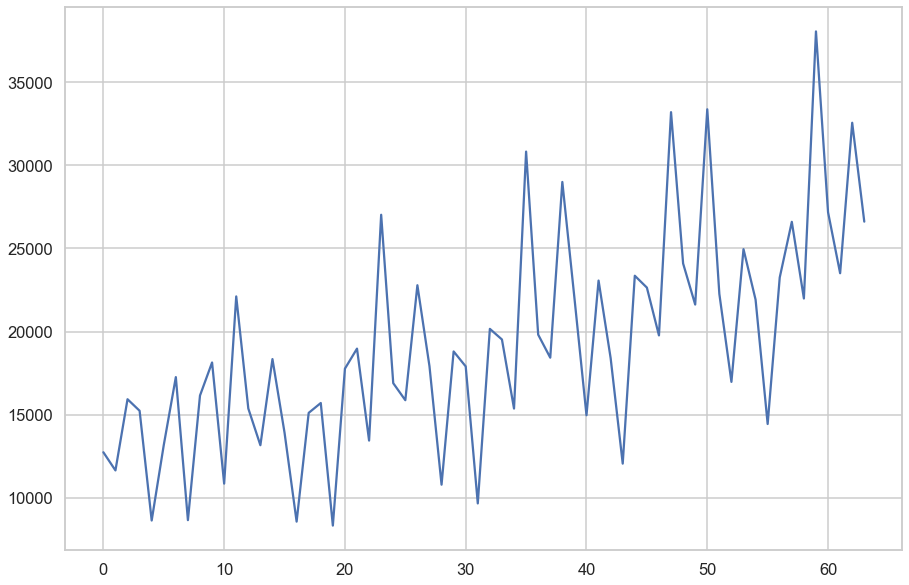

In [416]:
df5['Sales_quantity'].plot()

In [417]:
traces = []

for m in df5['Month'].unique():
    tmp = df5[df5['Month']==m]
    
    traces.append(Scatter(x = tmp['Y'], y = tmp['Sales_quantity'], name = str(m)))
    
iplot(Figure(data = traces))

In [418]:
train, test = df5[0:-12], df5[-12:]

out = list()
mod = LinearRegression()

for m in range(1,13):
    train1 = train[train['Month']==m]
    test1 = test[test['Month']==m]
    
    mod.fit(train1[['Y']], train1['Sales_quantity'])
    test1['preds'] = mod.predict(test1[['Y']])
    
    out.append(test1)

/var/folders/zz/hsmpk95x7nbckptds7j5_q340000gn/T/ipykernel_29241/3695979314.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zz/hsmpk95x7nbckptds7j5_q340000gn/T/ipykernel_29241/3695979314.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zz/hsmpk95x7nbckptds7j5_q340000gn/T/ipykernel_29241/3695979314.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [419]:
test_new = pd.concat(out)
test_new

,Revenue,Sales_quantity,Average_cost,Date,Month,Y,preds
60,5.628830e+07,27184.0,2070.640850,2020-01-01,1,2020,25932.5
61,4.022524e+07,23509.0,1711.057181,2020-02-01,2,2020,23714.3
62,5.002217e+07,32569.0,1535.882748,2020-03-01,3,2020,37559.7
63,5.232069e+07,26615.0,1965.834790,2020-04-01,4,2020,24928.8
52,3.253166e+07,16967.0,1917.348827,2019-05-01,5,2019,16037.5
53,4.770970e+07,24958.0,1911.599553,2019-06-01,6,2019,25886.5
54,4.599214e+07,21917.0,2098.468840,2019-07-01,7,2019,18719.5
55,3.693367e+07,14431.0,2559.328184,2019-08-01,8,2019,12548.5
56,4.852626e+07,23253.0,2086.881698,2019-09-01,9,2019,25365.5
57,4.416042e+07,26603.0,1659.978806,2019-10-01,10,2019,23336.0


In [420]:
trace1 = Scatter(x = train['Date'], y = train['Sales_quantity'], name = 'Train set')
trace2 = Scatter(x = test['Date'], y = test['Sales_quantity'], name = 'Test set')
trace3 = Scatter(x = test['Date'], y = test_new['preds'], name = 'Predictions')

iplot(Figure(data = [trace1, trace2, trace3]))

In [421]:
df5['year_shift'] = df5['Sales_quantity'].shift(3)
df5.dropna(inplace=True)
df5

,Revenue,Sales_quantity,Average_cost,Date,Month,Y,year_shift
3,1.881458e+07,15227.0,1235.606705,2015-04-01,4,2015,12729.0
4,1.402148e+07,8620.0,1626.621765,2015-05-01,5,2015,11636.0
5,1.678393e+07,13160.0,1275.374508,2015-06-01,6,2015,15922.0
6,1.916189e+07,17254.0,1110.576805,2015-07-01,7,2015,15227.0
7,1.520498e+07,8642.0,1759.428870,2015-08-01,8,2015,8620.0
...,...,...,...,...,...,...,...
59,5.875647e+07,38069.0,1543.420464,2019-12-01,12,2019,23253.0
60,5.628830e+07,27184.0,2070.640850,2020-01-01,1,2020,26603.0
61,4.022524e+07,23509.0,1711.057181,2020-02-01,2,2020,21987.0
62,5.002217e+07,32569.0,1535.882748,2020-03-01,3,2020,38069.0


In [422]:
n_splits = 5
test_size = 12
size = len(df5)
r2_list = []
mae_list = []
model = mod = LinearRegression()

for i in reversed(range(n_splits)):
    idx = size - (i + 1) * test_size
    train = df5[0:idx]
    test = df5[idx:idx + test_size]

    model.fit(train[['year_shift']], train['Sales_quantity'])
    predictions1 = model.predict(test[['year_shift']])

    r2_list.append(r2_score(test['Sales_quantity'], predictions1))
    mae_list.append(mean_absolute_error(test['Sales_quantity'], predictions1))

print(f'R2score = {np.round(np.mean(r2_list), 2)}, MAE = {np.round(np.mean(mae_list), 2)}')

R2score = 0.3, MAE = 3401.43


In [423]:
trace1 = Scatter(x = train['Date'], y = train['Sales_quantity'], name = 'Train set')
trace2 = Scatter(x = test['Date'], y = test['Sales_quantity'], name = 'Test set')
trace3 = Scatter(x = test['Date'], y = predictions1, name = 'Predictions')

iplot(Figure(data = [trace1, trace2, trace3]))

In [424]:
n_splits = 5
test_size = 12
size = len(df5)
r2_list = []
mae_list = []
model = mod = LinearRegression()

for i in reversed(range(n_splits)):
    idx = size - (i + 1) * test_size
    train = df5[0:idx]
    test = df5[idx:idx + test_size]

    model.fit(train[['year_shift', 'Average_cost']], train['Sales_quantity'])
    predictions = model.predict(test[['year_shift', 'Average_cost']])

    r2_list.append(r2_score(test['Sales_quantity'], predictions))
    mae_list.append(mean_absolute_error(test['Sales_quantity'], predictions))

print(f'R2score = {np.round(np.mean(r2_list), 2)}, MAE = {np.round(np.mean(mae_list), 2)}')

R2score = 0.31, MAE = 3424.66


In [425]:
trace1 = Scatter(x = train['Date'], y = train['Sales_quantity'], name = 'Train set')
trace2 = Scatter(x = test['Date'], y = test['Sales_quantity'], name = 'Test set')
trace3 = Scatter(x = test['Date'], y = predictions, name = 'Predictions')

iplot(Figure(data = [trace1, trace2, trace3]))

In [426]:
n_splits = 5
test_size = 12
size = len(df5)
r2_list = []
mae_list = []
model = mod = LinearRegression()

for i in reversed(range(n_splits)):
    idx = size - (i + 1) * test_size
    train = df5[0:idx]
    test = df5[idx:idx + test_size]

    model.fit(train[['Average_cost']], train['Sales_quantity'])
    preds_a = model.predict(test[['Average_cost']])

    r2_list.append(r2_score(test['Sales_quantity'],  preds_a))
    mae_list.append(mean_absolute_error(test['Sales_quantity'],  preds_a))

print(f'R2score = {np.round(np.mean(r2_list), 2)}, MAE = {np.round(np.mean(mae_list), 2)}')

R2score = -0.62, MAE = 5649.84


In [427]:
trace1 = Scatter(x = train['Date'], y = train['Sales_quantity'], name = 'Train set')
trace2 = Scatter(x = test['Date'], y = test['Sales_quantity'], name = 'Test set')
trace3 = Scatter(x = test['Date'], y = preds_a, name = 'Predictions')

iplot(Figure(data = [trace1, trace2, trace3]))

In [428]:
df5

,Revenue,Sales_quantity,Average_cost,Date,Month,Y,year_shift
3,1.881458e+07,15227.0,1235.606705,2015-04-01,4,2015,12729.0
4,1.402148e+07,8620.0,1626.621765,2015-05-01,5,2015,11636.0
5,1.678393e+07,13160.0,1275.374508,2015-06-01,6,2015,15922.0
6,1.916189e+07,17254.0,1110.576805,2015-07-01,7,2015,15227.0
7,1.520498e+07,8642.0,1759.428870,2015-08-01,8,2015,8620.0
...,...,...,...,...,...,...,...
59,5.875647e+07,38069.0,1543.420464,2019-12-01,12,2019,23253.0
60,5.628830e+07,27184.0,2070.640850,2020-01-01,1,2020,26603.0
61,4.022524e+07,23509.0,1711.057181,2020-02-01,2,2020,21987.0
62,5.002217e+07,32569.0,1535.882748,2020-03-01,3,2020,38069.0


In [429]:
n_splits = 5
test_size = 12
size = len(df5)
r2_list = []
mae_list = []
model = mod = RandomForestRegressor()

for i in reversed(range(n_splits)):
    idx = size - (i + 1) * test_size
    train = df5[0:idx]
    test = df5[idx:idx + test_size]

    model.fit(train[['year_shift', 'Average_cost']], train['Sales_quantity'])
    preds_f = model.predict(test[['year_shift', 'Average_cost']])

    r2_list.append(r2_score(test['Sales_quantity'],  preds_f))
    mae_list.append(mean_absolute_error(test['Sales_quantity'],  preds_f))

print(f'R2score = {np.round(np.mean(r2_list), 2)}, MAE = {np.round(np.mean(mae_list), 2)}')

R2score = 0.2, MAE = 3841.41


In [430]:
trace1 = Scatter(x = train['Date'], y = train['Sales_quantity'], name = 'Train set')
trace2 = Scatter(x = test['Date'], y = test['Sales_quantity'], name = 'Test set')
trace3 = Scatter(x = test['Date'], y = preds_f, name = 'Predictions')

iplot(Figure(data = [trace1, trace2, trace3]))

In [477]:
df6 = df5.copy()
df6

,Revenue,Sales_quantity,Average_cost,Date,Month,Y,year_shift
3,1.881458e+07,15227.0,1235.606705,2015-04-01,4,2015,12729.0
4,1.402148e+07,8620.0,1626.621765,2015-05-01,5,2015,11636.0
5,1.678393e+07,13160.0,1275.374508,2015-06-01,6,2015,15922.0
6,1.916189e+07,17254.0,1110.576805,2015-07-01,7,2015,15227.0
7,1.520498e+07,8642.0,1759.428870,2015-08-01,8,2015,8620.0
...,...,...,...,...,...,...,...
59,5.875647e+07,38069.0,1543.420464,2019-12-01,12,2019,23253.0
60,5.628830e+07,27184.0,2070.640850,2020-01-01,1,2020,26603.0
61,4.022524e+07,23509.0,1711.057181,2020-02-01,2,2020,21987.0
62,5.002217e+07,32569.0,1535.882748,2020-03-01,3,2020,38069.0


In [478]:
df6['year_shift'] = df6['Sales_quantity'].shift(12)
df6.dropna(inplace=True)
df6

,Revenue,Sales_quantity,Average_cost,Date,Month,Y,year_shift
15,2.835101e+07,13909.0,2038.321083,2016-04-01,4,2016,15227.0
16,1.526460e+07,8553.0,1784.707557,2016-05-01,5,2016,8620.0
17,2.438566e+07,15101.0,1614.837301,2016-06-01,6,2016,13160.0
18,2.948652e+07,15695.0,1878.720425,2016-07-01,7,2016,17254.0
19,1.527012e+07,8314.0,1836.675157,2016-08-01,8,2016,8642.0
20,3.614103e+07,17764.0,2034.509545,2016-09-01,9,2016,16144.0
21,2.791514e+07,18969.0,1471.619150,2016-10-01,10,2016,18135.0
22,2.127205e+07,13433.0,1583.566541,2016-11-01,11,2016,10841.0
23,4.201416e+07,27029.0,1554.410444,2016-12-01,12,2016,22113.0
24,3.600738e+07,16889.0,2132.001934,2017-01-01,1,2017,15365.0


In [482]:
len(df6)

49

In [483]:
n_splits = 3
test_size = 12
size = len(df6)
r2_list = []
mae_list = []
model = LinearRegression()

for i in reversed(range(n_splits)):
    idx = size - (i + 1) * test_size
    train = df6[0:idx]
    test = df6[idx:idx + test_size]

    model.fit(train[['year_shift']], train['Sales_quantity'])
    predictions6 = model.predict(test[['year_shift']])

    r2_list.append(r2_score(test['Sales_quantity'], predictions6))
    mae_list.append(mean_absolute_error(test['Sales_quantity'], predictions6))

print(f'R2score = {np.round(np.mean(r2_list), 2)}, MAE = {np.round(np.mean(mae_list), 2)}')

R2score = 0.91, MAE = 1349.5


In [484]:
trace1 = Scatter(x = train['Date'], y = train['Sales_quantity'], name = 'Train set')
trace2 = Scatter(x = test['Date'], y = test['Sales_quantity'], name = 'Test set')
trace3 = Scatter(x = test['Date'], y = predictions6, name = 'Predictions')

iplot(Figure(data = [trace1, trace2, trace3]))

In [487]:
n_splits = 3
test_size = 12
size = len(df6)
r2_list = []
mae_list = []
model = LinearRegression()

for i in reversed(range(n_splits)):
    idx = size - (i + 1) * test_size
    train = df6[0:idx]
    test = df6[idx:idx + test_size]

    model.fit(train[['year_shift','Average_cost']], train['Sales_quantity'])
    predictions_6 = model.predict(test[['year_shift','Average_cost']])

    r2_list.append(r2_score(test['Sales_quantity'], predictions_6))
    mae_list.append(mean_absolute_error(test['Sales_quantity'], predictions_6))

print(f'R2score = {np.round(np.mean(r2_list), 2)}, MAE = {np.round(np.mean(mae_list), 2)}')

R2score = 0.91, MAE = 1426.06


In [488]:
trace1 = Scatter(x = train['Date'], y = train['Sales_quantity'], name = 'Train set')
trace2 = Scatter(x = test['Date'], y = test['Sales_quantity'], name = 'Test set')
trace3 = Scatter(x = test['Date'], y = predictions_6, name = 'Predictions')

iplot(Figure(data = [trace1, trace2, trace3]))

In [495]:
df6 = df5.copy()
df6

,Revenue,Sales_quantity,Average_cost,Date,Month,Y,year_shift
3,1.881458e+07,15227.0,1235.606705,2015-04-01,4,2015,12729.0
4,1.402148e+07,8620.0,1626.621765,2015-05-01,5,2015,11636.0
5,1.678393e+07,13160.0,1275.374508,2015-06-01,6,2015,15922.0
6,1.916189e+07,17254.0,1110.576805,2015-07-01,7,2015,15227.0
7,1.520498e+07,8642.0,1759.428870,2015-08-01,8,2015,8620.0
...,...,...,...,...,...,...,...
59,5.875647e+07,38069.0,1543.420464,2019-12-01,12,2019,23253.0
60,5.628830e+07,27184.0,2070.640850,2020-01-01,1,2020,26603.0
61,4.022524e+07,23509.0,1711.057181,2020-02-01,2,2020,21987.0
62,5.002217e+07,32569.0,1535.882748,2020-03-01,3,2020,38069.0


In [496]:
df6['year_shift'] = df6['Sales_quantity'].shift(3)
df6.dropna(inplace=True)
df6

,Revenue,Sales_quantity,Average_cost,Date,Month,Y,year_shift
6,1.916189e+07,17254.0,1110.576805,2015-07-01,7,2015,15227.0
7,1.520498e+07,8642.0,1759.428870,2015-08-01,8,2015,8620.0
8,2.060394e+07,16144.0,1276.259909,2015-09-01,9,2015,13160.0
9,2.099287e+07,18135.0,1157.588904,2015-10-01,10,2015,17254.0
10,1.499337e+07,10841.0,1383.024597,2015-11-01,11,2015,8642.0
11,2.779181e+07,22113.0,1256.808558,2015-12-01,12,2015,16144.0
12,2.860159e+07,15365.0,1861.476505,2016-01-01,1,2016,18135.0
13,2.236707e+07,13153.0,1700.530226,2016-02-01,2,2016,10841.0
14,2.973861e+07,18339.0,1621.604699,2016-03-01,3,2016,22113.0
15,2.835101e+07,13909.0,2038.321083,2016-04-01,4,2016,15365.0


In [497]:
n_splits = 5
test_size = 3
size = len(df6)
r2_list = []
mae_list = []
model = LinearRegression()

for i in reversed(range(n_splits)):
    idx = size - (i + 1) * test_size
    train = df6[0:idx]
    test = df6[idx:idx + test_size]

    model.fit(train[['year_shift']], train['Sales_quantity'])
    predictions6 = model.predict(test[['year_shift']])

    r2_list.append(r2_score(test['Sales_quantity'], predictions6))
    mae_list.append(mean_absolute_error(test['Sales_quantity'], predictions6))

print(f'R2score = {np.round(np.mean(r2_list), 2)}, MAE = {np.round(np.mean(mae_list), 2)}')

R2score = 0.04, MAE = 3567.73


In [498]:
trace1 = Scatter(x = train['Date'], y = train['Sales_quantity'], name = 'Train set')
trace2 = Scatter(x = test['Date'], y = test['Sales_quantity'], name = 'Test set')
trace3 = Scatter(x = test['Date'], y = predictions6, name = 'Predictions')

iplot(Figure(data = [trace1, trace2, trace3]))